# Análisis Estadístico de la Producción en un Centro de Producción

Este cuaderno realiza un análisis estadístico sobre los datos de producción diaria en un centro de producción, abordando:
1. **Simulación de datos representativos**.
2. **Cálculo de intervalos de confianza para evaluar la variabilidad de la media de producción**.
3. **Contrastes de hipótesis** para determinar si la media diaria es significativamente diferente de un valor esperado.

Cada sección incluye explicaciones sobre el propósito y el cálculo realizado.

In [5]:
# Importar bibliotecas necesarias
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Parámetros de entrada

Definimos las variables necesarias para la simulación y el análisis:
- `n`: Número de muestras (días de producción analizados).
- `media_real`: Media real de la producción diaria del proceso.
- `desviacion_real`: Desviación estándar real del proceso, que refleja la variabilidad diaria.
- `nivel_confianza`: Nivel de confianza para calcular los intervalos de confianza.
- `nivel_significancia`: Nivel de significancia para realizar el contraste de hipótesis.

In [6]:
# Parámetros de entrada
np.random.seed(42)  # Semilla para reproducibilidad
n = 50  # Número de muestras (días de producción)
media_real = 100  # Media de producción diaria real
desviacion_real = 10  # Desviación estándar real de la producción

# Niveles de significancia e intervalos de confianza
nivel_confianza = 0.95
nivel_significancia = 0.05  # Complemento del nivel de confianza

## Simulación de Datos

Generamos datos de producción diaria siguiendo una distribución normal con la media y desviación estándar definidas previamente. 
Esto nos permite simular un conjunto representativo de valores que podrían observarse en el proceso real.

In [7]:
# Simulamos la producción diaria
produccion_diaria = np.random.normal(loc=media_real, scale=desviacion_real, size=n)

## Cálculo del Intervalo de Confianza

El intervalo de confianza proporciona un rango en el que es probable que se encuentre la media real de la producción diaria.
- **Media muestral**: Calculada como el promedio de los datos simulados.
- **Error estándar**: Calculado como la desviación estándar de la muestra dividida por la raíz cuadrada del tamaño de la muestra.
- **Intervalo**: Usamos la distribución *t* de Student para calcular el intervalo considerando el nivel de confianza definido.

In [8]:
# Cálculo del intervalo de confianza
media_muestral = np.mean(produccion_diaria)
error_estandar = stats.sem(produccion_diaria)

# Ajuste de alpha -> confidence
intervalo = stats.t.interval(
    confidence=nivel_confianza,  # Cambiado de alpha a confidence
    df=n-1, 
    loc=media_muestral, 
    scale=error_estandar
)

print("Intervalo de confianza al 95% para la media:", intervalo)

Intervalo de confianza al 95% para la media: (np.float64(95.0918036285815), np.float64(100.39871826629569))


## Contraste de Hipótesis

Evaluamos si la media diaria de producción es significativamente diferente del valor esperado de 100 unidades.
- **Hipótesis nula (H0)**: La media diaria es igual a 100.
- **Hipótesis alternativa (H1)**: La media diaria es diferente de 100.

Realizamos un test *t* de una muestra para calcular el estadístico y el p-valor:
- **Estadístico t**: Indica cuántas desviaciones estándar se encuentra la media muestral del valor hipotético.
- **P-valor**: Probabilidad de observar los datos obtenidos si la hipótesis nula es verdadera.
- **Criterio de decisión**: Rechazamos H0 si el p-valor es menor que el nivel de significancia (0.05).

In [9]:
# Realizamos el contraste de hipótesis
estadistico, p_valor = stats.ttest_1samp(produccion_diaria, popmean=100)

print("\nResultados del contraste de hipótesis:")
print(f"Estadístico t: {estadistico:.2f}")
print(f"P-valor: {p_valor:.4f}")

if p_valor < nivel_significancia:
    print("Rechazamos H0: La media de producción diaria es significativamente diferente de 100.")
else:
    print("No rechazamos H0: No hay evidencia suficiente para afirmar que la media es diferente de 100.")


Resultados del contraste de hipótesis:
Estadístico t: -1.71
P-valor: 0.0940
No rechazamos H0: No hay evidencia suficiente para afirmar que la media es diferente de 100.


## Visualización de Resultados

Representamos gráficamente los datos simulados mediante un histograma, resaltando:
- **Media muestral**: Línea roja punteada.
- **Límites del intervalo de confianza**: Líneas verde y azul punteadas.

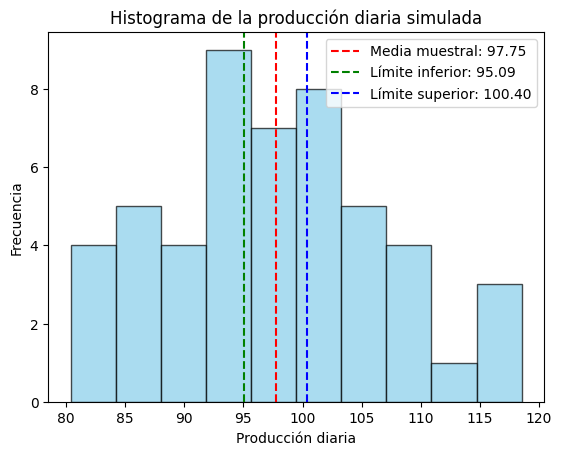

In [10]:
# Histograma de los datos simulados
plt.hist(produccion_diaria, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(media_muestral, color='red', linestyle='--', label=f'Media muestral: {media_muestral:.2f}')
plt.axvline(intervalo[0], color='green', linestyle='--', label=f'Límite inferior: {intervalo[0]:.2f}')
plt.axvline(intervalo[1], color='blue', linestyle='--', label=f'Límite superior: {intervalo[1]:.2f}')
plt.title("Histograma de la producción diaria simulada")
plt.xlabel("Producción diaria")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

## Análisis Final y Conclusión

### Análisis
- **Intervalo de confianza**: Si el valor esperado (100) está dentro del intervalo, no hay evidencia suficiente para sugerir que la media difiere significativamente de este valor.
- **Contraste de hipótesis**: Si el p-valor es menor que el nivel de significancia (0.05), rechazamos H0; de lo contrario, no la rechazamos.

### Conclusión
- **Rechazo de H0**: Si rechazamos H0, concluimos que la media diaria de producción difiere significativamente de 100, indicando una posible desviación en el proceso.
- **No rechazo de H0**: Si no se rechaza H0, no hay evidencia estadística para afirmar que la media difiere de 100.
